In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.4/314.4 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.5 MB/s eta

In [90]:
from transformers.utils import logging
logging.set_verbosity_error()

In [91]:
from transformers import pipeline

In [92]:
sm_pipe = pipeline("mask-generation",
    "Zigeng/SlimSAM-uniform-77")

In [93]:
from PIL import Image

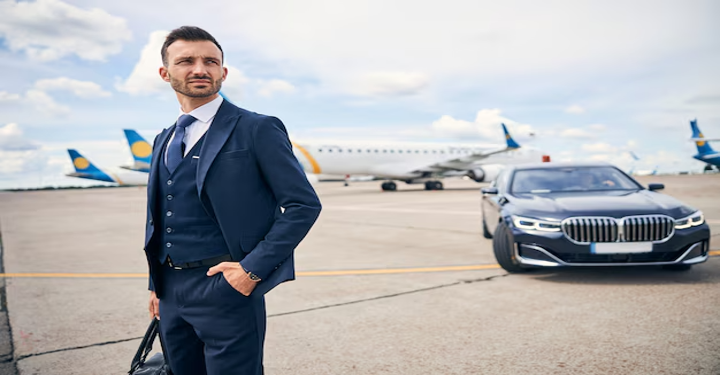

In [94]:
raw_image = Image.open('/content/1(1).png')
raw_image.resize((720, 375))

In [95]:
output = sm_pipe(raw_image, points_per_batch=32)

In [111]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def show_pipe_masks_on_image(raw_image, output):

    image = cv2.cvtColor(np.array(raw_image), cv2.COLOR_RGB2BGR)

    masks = output["masks"]

    combined_mask = np.zeros_like(image[:, :, 0])


    for mask in masks:
        combined_mask = np.maximum(combined_mask, mask.astype(np.uint8))

    color_map = np.random.randint(0, 255, size=(3), dtype=np.uint8)

    colored_mask = np.repeat(combined_mask[:, :, np.newaxis], 3, axis=2) * color_map

    alpha = 0.5
    blended_image = cv2.addWeighted(image.astype(np.uint8), 1 - alpha, colored_mask.astype(np.uint8), alpha, 0)

    cv2_imshow(blended_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

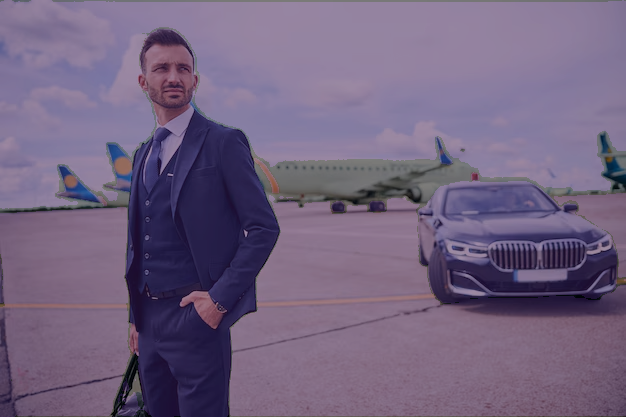

In [112]:
show_pipe_masks_on_image(raw_image, output)